<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>


<p align="center">Análisis de Datos</p>


<p align="center"> Grupo: XX </p>

 <p align="center"> Tarea 4 - Algoritmos de Aprendizaje no Supervisado</p>

 <p align="center">  Presentado por: Ángela Bibiana Ortegón Fuentes</p>

<p align="center"> Código: 23914069</p>

 <p align="center">  Tutor: Sandra M. Patiño</p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> Octubre 15 de 2024</p>

# Agrupamiento en Hierarchical Clustering


## Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenido.s
8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/


### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [423]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')




El Hierarchical Clustering es una técnica de clustering no supervisado que permite agrupar a los clientes según sus comportamientos o características comunes.es un conjunto de datos utilizado comúnmente en análisis de marketing, en particular para realizar segmentaciones de clientes, análisis de comportamiento y optimización de campañas publicitarias. Este dataset contiene información de clientes de una campaña de marketing de una empresa, con diversas características que permiten segmentar a los clientes en función de su comportamiento de compra y otras variables demográficas.


In [300]:
# Cargar el conjunto de datos en la variable data
data = pd.read_csv('ejemplo1.csv', sep=';')


In [302]:
data.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


aa: identificador único para cada cliente.
Balance: El saldo disponible o el balance de alguna cuenta o tarjeta de los clientes.
Qual_miles: Las millas de calidad acumuladas por los clientes.
cc1_miles, cc2_miles, cc3_miles: Las millas acumuladas en diferentes tarjetas de crédito.
Bonus_miles: Las millas extra acumuladas como bonificación.
Bonus_trans: El número de transacciones que generaron bonos.
Flight_miles_12mo: Las millas voladas en los últimos 12 meses.
Flight_trans_12: El número de transacciones de vuelo realizadas en los últimos 12 meses.
Days_since_enroll: Los días desde que el cliente se inscribió en el programa de la aerolínea.
Award: El número de premios o beneficios obtenidos.

In [305]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [307]:

# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Explicación resultado:
* Tipo de Datos (<class 'pandas.core.frame.DataFrame'>):
Esto indica que el objeto que has cargado es un DataFrame, que es una tabla de datos similar a una hoja de cálculo de Excel o una tabla SQL, donde las filas y columnas se indexan y etiquetan.

* RangeIndex: 3999 entries, 0 to 3998:
El índice del DataFrame tiene 3999 filas, numeradas desde 0 hasta 3998. Esto significa que hay 3999 registros (clientes, en este caso).

* Data columns (total 12 columns):aa  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award
  
* Non-Null Count: Cada columna tiene 3999 valores no nulos, lo que indica que no hay datos faltantes en este conjunto de datos para estas variables.

* Dtype: Todas las columnas tienen el tipo de dato int64, lo que significa que los valores en estas columnas son enteros de 64 bits.

* Memory usage: 375.0 KB: El DataFrame ocupa aproximadamente 375 KB en memoria, lo que es un tamaño bastante pequeño para este conjunto de datos.

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

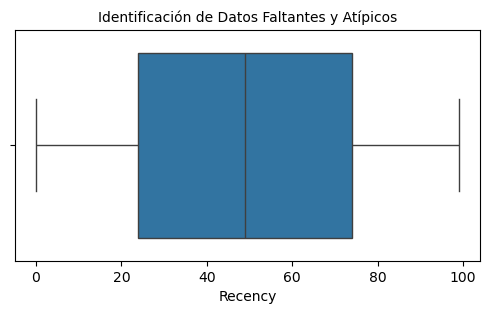

In [310]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Recency']) #Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario


### Identificar datos Faltantes

In [314]:
# Identificar columnas con datos faltantes
print(data.isnull().sum())


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64





* **Eliminar filas con datos faltantes**: Puedes eliminar las filas o columnas con valores faltantes si son pocas y no impactan significativamente el análisis.
data_clean = data.dropna()

* **Rellenar valores faltantes con la media de la columna** Rellenar los valores faltantes con un valor como la media, mediana, o moda de la columna.

data['columna'] = data['columna'].fillna(data['columna'].mean())

* **Imputación avanzada: Usar técnicas más sofisticadas como KNN o modelos de regresión para predecir los valores faltantes.**
Técnicas adicionales:

Interpolación: Puedes usar la interpolación para llenar los valores faltantes en series temporales.
data['columna'] = data['columna'].interpolate()


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

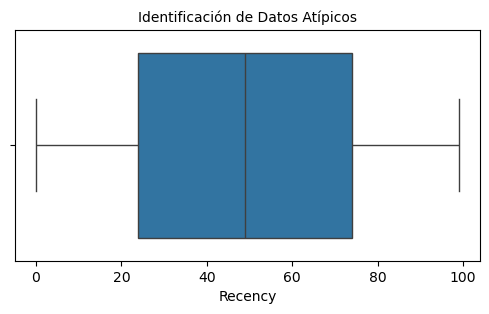

In [317]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Recency'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [319]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Recency']<nivel_minimo)|(data['Recency']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [321]:
# Filtra Datos Atípicos

Datos=data[(data['Recency']<nivel_maximo)&(data['Recency']>nivel_minimo)]

In [323]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2188 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   int64 

### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Para seleccionar las características más relevantes del dataset Marketing Campaign para entrenar un modelo de Hierarchical Clustering, es importante entender cuáles variables pueden realizar  segmentación de clientes. 

* Aspectos demográficos,
* comportamientos de compra
* patrones de respuesta del cliente

1. Las características demográficas brindan información sobre el perfil básico de los clientes:

* Age: La edad del cliente puede influir en sus patrones de compra y preferencias.
* Education: El nivel educativo puede estar correlacionado con ciertos tipos de productos o niveles de gasto.
* Income: El ingreso anual del cliente puede ayudar a segmentar en función de la capacidad de gasto.
* Marital_Status: El estado civil podría influir en el tipo de productos o servicios preferidos.
Estas características son útiles para la segmentación de clientes y permiten identificar patrones demográficos que pueden correlacionarse con comportamientos específicos.

2. Selección de características de comportamiento de compra
Estas características se enfocan en cómo los clientes interactúan con la empresa en términos de frecuencia y volumen de gasto:

* Recency: Tiempo desde la última compra. Para diferenciar clientes recientes de clientes inactivos.
* Frequency: Número de compras realizadas. Diferenciar a los compradores frecuentes de los esporádicos.
* Monetary (o Total Spent): Cantidad total gastada por el cliente en un periodo determinado, identificar clientes de alto valor.

3. Selección de características de respuesta a campañas: indican la probabilidad de que el cliente responda a promociones:

* Response: Respuesta a campañas anteriores,  identificar clientes que son más receptivos a ciertas ofertas.
* Complain: Clientes que han presentado quejas pueden representar segmentos de clientes menos satisfechos.

In [327]:


# Calcular el año actual
current_year = datetime.now().year

# Calcular la edad y agregar como columna 'Age'
Datos['Age'] = current_year - Datos['Year_Birth']

# Mostrar las primeras filas para verificar
Datos[['Year_Birth', 'Age']].head()

,Year_Birth,Age
0,1957,67
1,1954,70
2,1965,59
3,1984,40
4,1981,43


In [329]:
# Filtrar columnas del modelo 

Datos1 = Datos[["Age","Education","Income","Marital_Status"]]


In [331]:
# Revisión de los datos de las variables objetivo
Datos1.head(40)

,Age,Education,Income,Marital_Status
0,67,Graduation,58138.0,Single
1,70,Graduation,46344.0,Single
2,59,Graduation,71613.0,Together
3,40,Graduation,26646.0,Together
4,43,PhD,58293.0,Married
5,57,Master,62513.0,Together
6,53,Graduation,55635.0,Divorced
7,39,PhD,33454.0,Married
8,50,PhD,30351.0,Together
9,74,PhD,5648.0,Together


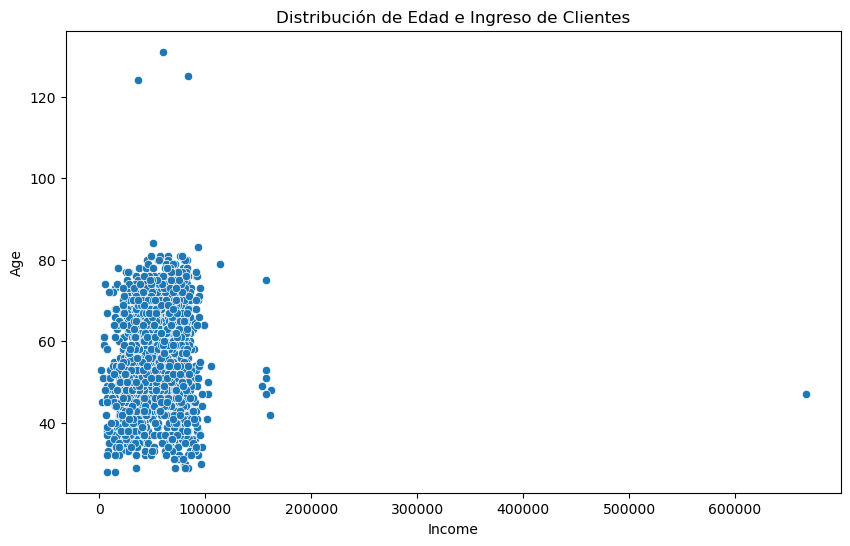

In [341]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Income'], y=Datos1['Age'])
plt.title('Distribución de Edad e Ingreso de Clientes')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

### 4. Entrenar el modelo configurando los diferentes hiperparámetros

**Preparación de los Datos**
Para aplicar el modelo de clustering jerárquico, es recomendable estandarizar los datos si contienen diferentes escalas. Esto se hace con el StandardScaler de scikit-learn, que centra los datos alrededor de 0 y les da una desviación estándar de 1:

In [369]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Income', 'Age', 'Recency', 'MntWines']])

**Visualización del Dendrograma**
Antes de aplicar el modelo, es común visualizar el dendrograma para tener una idea de cómo se agruparán los datos. Esto se puede hacer con la función linkage de SciPy y dendrogram para mostrar el árbol de agrupamiento.

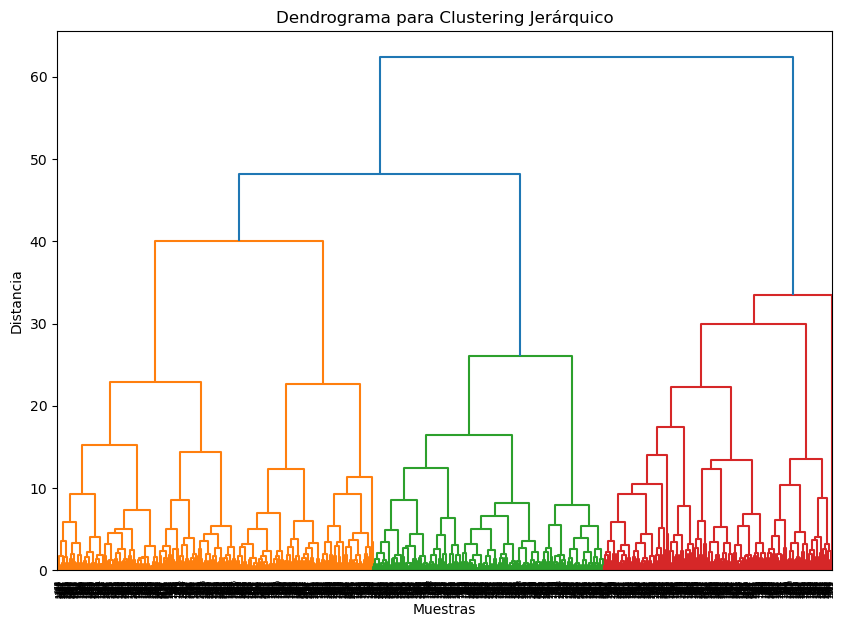

In [372]:

# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

 En este gráfico, cada fusión (cada rama que se une) representa la combinación de dos clústeres o muestras.
Las ramas largas indican que las muestras o clústeres que se están uniendo tienen gran disimilitud, mientras que las ramas cortas indican que los elementos fusionados son muy similares.
En función de la distancia en el eje Y, puedes determinar cuántos clústeres deseas extraer del análisis de agrupamiento, ya que el corte en el dendrograma a una cierta altura te dará el número de grupos a conservar.

Interpretación:

Ingresos: Las muestras con ingresos similares tenderán a unirse en ramas cortas, lo que indica que las personas con ingresos parecidos tienden a tener características similares en otras variables.

Edad: Los grupos de edad similarmente agrupados pueden aparecer en el dendrograma con ramas cortas. Las personas de edades similares pueden compartir comportamientos de compra similares, especialmente cuando se observan en el contexto de otros factores como el ingreso.

Recency(Reciente): Este atributo indica cuán recientemente una persona ha realizado una compra o interacción. En el dendrograma. Las diferencias en recencia podrían ser un factor clave al separar a los clientes que interactúan más frecuentemente de aquellos que no lo hacen.

'MntWines' (Gasto en vinos): Similar a los ingresos, el gasto en vinos probablemente influirá en la agrupación. Los clústeres que incluyen individuos con altos gastos en vinos se separarán de aquellos que gastan menos en este producto, lo que puede revelar patrones de compra de productos específicos.

In [378]:

# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
Datos[['Income', 'Age', 'Recency', 'MntWines']] = Datos[['Income', 'Age', 'Recency', 'MntWines']].fillna(Datos[['Income', 'Age', 'Recency', 'MntWines']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Income', 'Age', 'Recency', 'MntWines']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.21843947001011746
Índice de Calinski-Harabasz: 632.7581547803846
Índice de Davies-Bouldin: 1.4527304212214105


### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

 * **Gráfico de Dispersión para Visualización de Clusters**

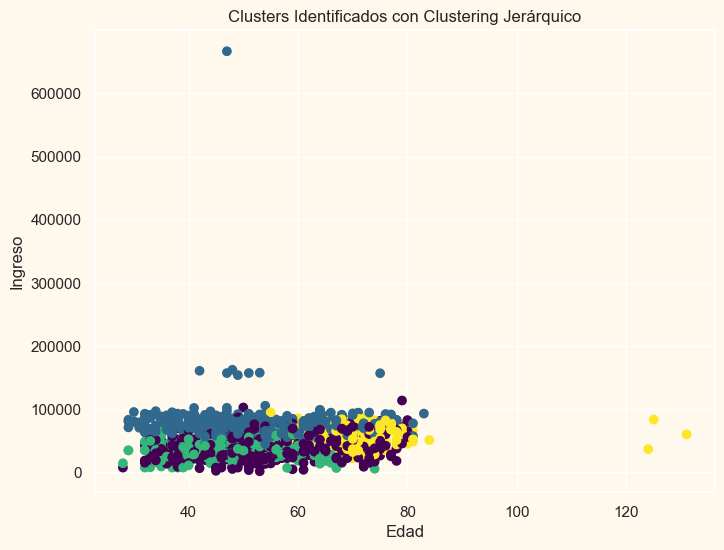

In [404]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Datos1['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Income'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

Este gráfico te muestra cómo se agrupan las muestras según las características seleccionadas, en este caso, Edad e Ingreso. Los puntos de diferentes colores representan diferentes clusters.

* **Gráfico de Silueta**

Este gráfico muestra cuán similar es cada punto a su propio grupo en comparación con otros grupos. Un valor alto (cercano a 1) indica que los puntos están bien agrupados, mientras que un valor bajo (cercano a -1) indica que están mal asignados.

Silhouette Score: 0.19720511792567588


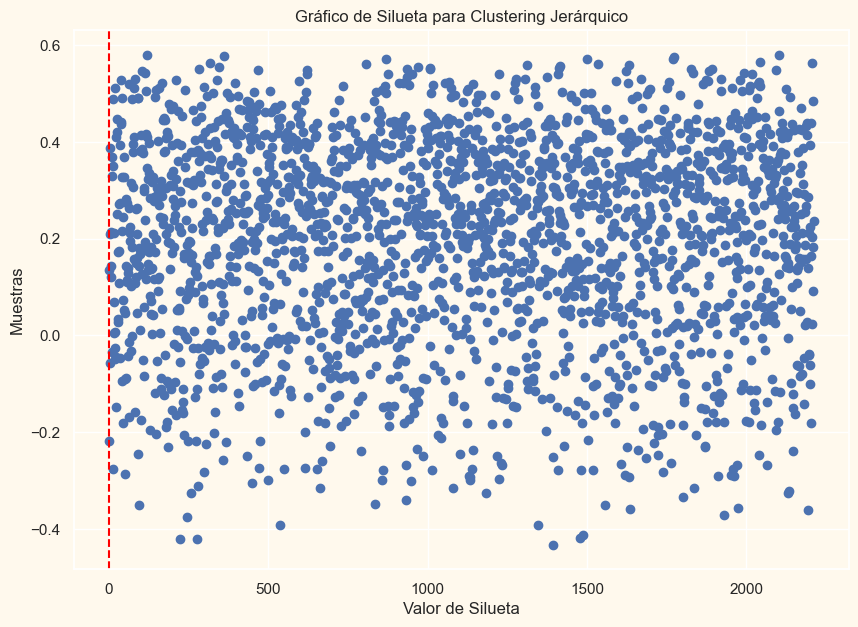

In [410]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()


Interpretación: El valor de la silueta ayuda a medir la calidad del clustering. Un valor cercano a +1 indica una buena asignación de los puntos a los clusters, mientras que valores cercanos a -1 indican que los puntos podrían estar mal clasificados.

### **7. Interpretar, analizar y documentar los resultados obtenidos**

* La edad del cliente puede influyé en sus patrones de compra y preferencias.
* El estado civil podría influyé en el tipo de productos o servicios preferidos por los clientes.
* En el gráfico de silueta las Silhouettes están mas agrupadas y cercanas a +1, eso nos indica que la mayoría de los puntos están correctamente asignados a su cluster y que los clusters están bien separados.
* Un valor de 0.2184 de Coeficiente de Silhouette indica que los clusters no están tan bien separados ni son tan coherentes. Aunque los puntos dentro de cada cluster están algo agrupados, hay cierta superposición entre los clusters, lo que podría sugerir que los grupos podrían no ser perfectamente distintos.
* El índice de Calinski-Harabasz es de 632.758 es bastante alto, lo que sugiere que los clusters son relativamente compactos y bien separados. En general, un valor superior a 500 generalmente indica que el modelo ha realizado una buena segmentación.
* Davies-Bouldin de 1.4527 indica que los clusters no son perfectamente separados, pero tampoco son excesivamente dispersos o solapados.

### 8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados
   https://github.com/